Name: Gu Huaqing Github Username: JuliaGHQ Student ID: 2433803934

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, roc_curve, accuracy_score, auc
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.pairwise import euclidean_distances as eu_dist
from sklearn.neighbors import KNeighborsClassifier

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set.

In [3]:
orignal_features = ["radius", "texture", "perimeter", "area", "smoothness",
               "compactness", "concavity", "concave points", "symmetry", "fractal dimension"]
features = ["Mean " + i for i in orignal_features] + [i + " SE" for i in orignal_features] + ["Worst " + i for i in orignal_features]
data = pd.read_csv("./Data/wdbc.data", header = None, names = ["ID", "Diagnosis"] + features)
data = data.drop(columns = ["ID"])
data

,Diagnosis,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smoothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,...,Worst radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


b) Monte-Carlo Simulation

i)Supervised Learning: Train an L1-penalized SVM to classify the data.Use 5 fold cross validation to choose the penalty parameter. Use normalized data.

In [4]:
pos = data[data["Diagnosis"] == "M"].copy()
pos.loc[:, "Diagnosis"] = 1
neg = data[data["Diagnosis"] == "B"].copy()
neg.loc[:, "Diagnosis"] = 0

In [5]:
svm = LinearSVC(penalty = "l1", dual = False)

train_accuracy = []
train_precision = []
train_recall = []
train_F1 = []
train_AUC = []

test_accuracy = []
test_precision = []
test_recall = []
test_F1 = []
test_AUC = []

In [16]:
import sys
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

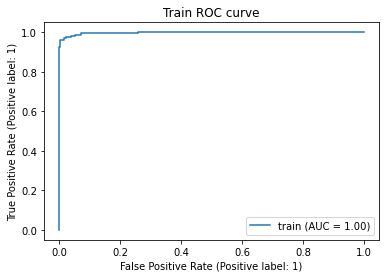

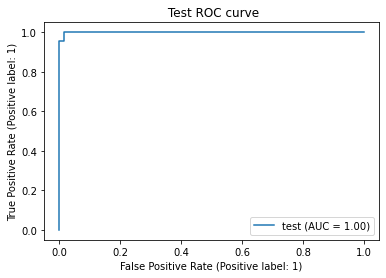

Train confusion matrix is [[283   2]
 [  7 162]]
Test confusion matrix is [[71  1]
 [ 1 42]]
Avg train acc is 0.9859471365638767
Avg test acc is 0.970144927536232
Avg train precision is 0.9917763954680933
Avg test precision is 0.9748402671741777
Avg train recall is 0.9702958579881654
Avg test recall is 0.9451162790697674
Avg train f1 score is 0.9809030077044956
Avg test f1 score is 0.9592153599984541
Avg train auc is 0.9976835184608464
Avg test auc is 0.9916946597760551


In [17]:
for M in range(30):
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(pos[features], pos["Diagnosis"],
                                                                        test_size = 0.2, random_state = M)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(neg[features], neg["Diagnosis"],
                                                                        test_size = 0.2, random_state = M)
    X_train = pd.concat([X_train_pos, X_train_neg])
    y_train = pd.concat([y_train_pos, y_train_neg])
    X_test = pd.concat([X_test_pos, X_test_neg])
    y_test = pd.concat([y_test_pos, y_test_neg])
    # gridsearch for lambda
    pipe = Pipeline([("norm", MinMaxScaler()), ("svc", svm)])
    params = {"svc__C" : [0.01, 0.1, 1, 10, 100]}
    clf = GridSearchCV(pipe, params, cv = 5, scoring = "accuracy",  n_jobs = -1)
    clf.fit(X_train, y_train)
    # acc
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    # precision recall f1 score
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_precision.append(precision_score(y_train, y_pred_train))
    test_precision.append(precision_score(y_test, y_pred_test))
    train_recall.append(recall_score(y_train, y_pred_train))
    test_recall.append(recall_score(y_test, y_pred_test))
    train_F1.append(f1_score(y_train, y_pred_train))
    test_F1.append(f1_score(y_test, y_pred_test))
    # auc
    if M == 0:
        plot_roc_curve(clf, X_train, y_train, name = "train")
        plt.title("Train ROC curve")
        plot_roc_curve(clf, X_test, y_test, name = "test")
        plt.title(" Test ROC curve")
        plt.show()
        print(f"Train confusion matrix is {confusion_matrix(y_train, y_pred_train)}")
        print(f"Test confusion matrix is {confusion_matrix(y_test, y_pred_test)}")
    y_score_train = clf.decision_function(X_train)
    y_score_test = clf.decision_function(X_test)
    train_AUC.append(roc_auc_score(y_train, y_score_train))
    test_AUC.append(roc_auc_score(y_test, y_score_test))
print(f"Avg train acc is {np.mean(train_accuracy)}")
print(f"Avg test acc is {np.mean(test_accuracy)}")
print(f"Avg train precision is {np.mean(train_precision)}")
print(f"Avg test precision is {np.mean(test_precision)}")
print(f"Avg train recall is {np.mean(train_recall)}")
print(f"Avg test recall is {np.mean(test_recall)}")
print(f"Avg train f1 score is {np.mean(train_F1)}")
print(f"Avg test f1 score is {np.mean(test_F1)}")
print(f"Avg train auc is {np.mean(train_AUC)}")
print(f"Avg test auc is {np.mean(test_AUC)}")

ii)(A & B) Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

In [18]:
svm = LinearSVC(penalty = "l1", dual = False)
train_accuracy = []
train_precision = []
train_recall = []
train_F1 = []
train_AUC = []

test_accuracy = []
test_precision = []
test_recall = []
test_F1 = []
test_AUC = []

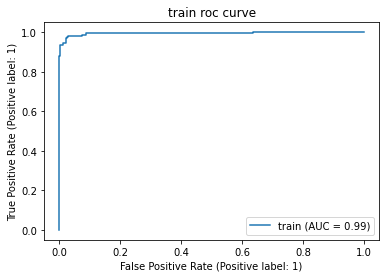

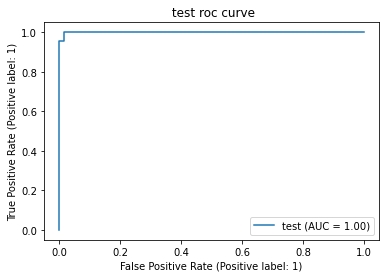

train confusion matrix is [[278   7]
 [  5 164]]
test confusion matrix is [[70  2]
 [ 0 43]]
Avg train acc is 0.9726138032305436
Avg test acc is 0.9692753623188405
Avg train precision is 0.9812680988433781
Avg test precision is 0.9751384052657204
Avg train recall is 0.9447731755424065
Avg test recall is 0.9426356589147286
Avg train f1 score is 0.9624838893502317
Avg test f1 score is 0.9577983432648048
Avg train auc is 0.994610194124364
Avg test auc is 0.9910960378983635


In [20]:
for M in range(30):
    # preprocessing data
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(pos[features], pos["Diagnosis"],
                                                                        test_size = 0.2, random_state = M)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(neg[features], neg["Diagnosis"],
                                                                        test_size = 0.2, random_state = M)
    X_label_pos, X_unlabel_pos, y_label_pos, y_unlabel_pos = train_test_split(X_train_pos, y_train_pos,
                                                                        test_size = 0.5, random_state = M)
    X_label_neg, X_unlabel_neg, y_label_neg, y_unlabel_neg = train_test_split(X_train_neg, y_train_neg,
                                                                        test_size = 0.5, random_state = M)
    X_label = pd.concat([X_label_pos, X_label_neg]).reset_index(drop = True)
    y_label = pd.concat([y_label_pos, y_label_neg]).reset_index(drop = True)
    X_unlabel = pd.concat([X_unlabel_pos, X_unlabel_neg]).reset_index(drop = True)
    y_unlabel = pd.concat([y_unlabel_pos, y_unlabel_neg]).reset_index(drop = True)
    X_test = pd.concat([X_test_pos, X_test_neg]).reset_index(drop = True)
    y_test = pd.concat([y_test_pos, y_test_neg]).reset_index(drop = True)
    
    # gridsearch for lambda
    pipe = Pipeline([("norm", MinMaxScaler()), ("svc", svm)])
    params = {"svc__C" : [0.01, 0.1, 1, 10, 100]}
    clf = GridSearchCV(pipe, params, cv = 5, scoring = "accuracy",  n_jobs = -1)
    clf.fit(X_label, y_label)
    best_C = clf.best_params_["svc__C"]
    
    # update svm(ignore the true label)
    pipe.set_params(svc__C = best_C)
    while len(X_unlabel) != 0:
        pipe.fit(X_label, y_label)
        dist = np.abs(pipe.decision_function(X_unlabel))
        index = np.argmax(dist)
        X_label = X_label.append(X_unlabel.iloc[index], ignore_index = True)
        y_label.loc[y_label.shape[0]] = pipe.predict(X_unlabel.iloc[index].values.reshape(1,-1))[0]
        X_unlabel = X_unlabel.drop([index]).reset_index(drop = True)
        y_unlabel = y_unlabel.drop([index]).reset_index(drop = True)
    
    # acc   
    train_accuracy.append(pipe.score(X_train, y_train))
    test_accuracy.append(pipe.score(X_test, y_test))
    # precision recall f1 score
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)
    train_precision.append(precision_score(y_train, y_pred_train))
    test_precision.append(precision_score(y_test, y_pred_test))
    train_recall.append(recall_score(y_train, y_pred_train))
    test_recall.append(recall_score(y_test, y_pred_test))
    train_F1.append(f1_score(y_train, y_pred_train))
    test_F1.append(f1_score(y_test, y_pred_test))
    # auc
    if M == 0:
        plot_roc_curve(pipe, X_train, y_train, name = "train")
        plt.title("train roc curve")
        plot_roc_curve(pipe, X_test, y_test, name = "test")
        plt.title(" test roc curve")
        plt.show()
        print(f"train confusion matrix is {confusion_matrix(y_train, y_pred_train)}")
        print(f"test confusion matrix is {confusion_matrix(y_test, y_pred_test)}")
    y_score_train = pipe.decision_function(X_train)
    y_score_test = pipe.decision_function(X_test)
    train_AUC.append(roc_auc_score(y_train, y_score_train))
    test_AUC.append(roc_auc_score(y_test, y_score_test))
print(f"Avg train acc is {np.mean(train_accuracy)}")
print(f"Avg test acc is {np.mean(test_accuracy)}")
print(f"Avg train precision is {np.mean(train_precision)}")
print(f"Avg test precision is {np.mean(test_precision)}")
print(f"Avg train recall is {np.mean(train_recall)}")
print(f"Avg test recall is {np.mean(test_recall)}")
print(f"Avg train f1 score is {np.mean(train_F1)}")
print(f"Avg test f1 score is {np.mean(test_F1)}")
print(f"Avg train auc is {np.mean(train_AUC)}")
print(f"Avg test auc is {np.mean(test_AUC)}")

iii) Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

In [24]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import random as rand

In [26]:
train_accuracy = []
train_precision = []
train_recall = []
train_F1 = []
train_AUC = []

test_accuracy = []
test_precision = []
test_recall = []
test_F1 = []
test_AUC = []


for M in range(30):
    # preprocessing data
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(pos[features], pos["Diagnosis"],
                                                                        test_size = 0.2, random_state = M)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(neg[features], neg["Diagnosis"],
                                                                        test_size = 0.2, random_state = M)
    X_train = pd.concat([X_train_pos, X_train_neg])
    y_train = pd.concat([y_train_pos, y_train_neg])
    X_test = pd.concat([X_test_pos, X_test_neg])
    y_test = pd.concat([y_test_pos, y_test_neg])
    
    kmeans=KMeans(n_clusters=2,init='k-means++',n_init=5,random_state=rand.randint(0,100))
    kmeans.fit(X_train)
    nbrs = NearestNeighbors(n_neighbors=30, algorithm='ball_tree').fit(X_train)
    print(kmeans.cluster_centers_)

[[1.92358095e+01 2.19160952e+01 1.27287619e+02 1.16828095e+03
  1.01689619e-01 1.50228952e-01 1.76030571e-01 1.00578952e-01
  1.91768571e-01 6.09470476e-02 7.51045714e-01 1.22385333e+00
  5.27556190e+00 9.50482857e+01 6.73426667e-03 3.26991619e-02
  4.22315238e-02 1.56652190e-02 2.02202857e-02 4.02333333e-03
  2.36953333e+01 2.92294286e+01 1.58492381e+02 1.74697143e+03
  1.41708762e-01 3.66082857e-01 4.50345714e-01 1.93792000e-01
  3.13035238e-01 8.75122857e-02]
 [1.25548166e+01 1.84969914e+01 8.11097421e+01 4.95900573e+02
  9.49165043e-02 9.12930946e-02 6.23887622e-02 3.35507307e-02
  1.78035244e-01 6.35120917e-02 3.03618052e-01 1.20511719e+00
  2.15375989e+00 2.36938109e+01 7.24731519e-03 2.35008309e-02
  2.93296103e-02 1.08875759e-02 2.04807421e-02 3.73218424e-03
  1.40201003e+01 2.44683668e+01 9.17220344e+01 6.17442407e+02
  1.30007851e-01 2.21569484e-01 2.17153215e-01 9.18774470e-02
  2.82299427e-01 8.31542693e-02]]
[[1.94880189e+01 2.17107547e+01 1.28674528e+02 1.20041887e+03
  1

I think we cannot make sure that our algorithm is not trapped in a local minimum. In probabilistic terms, there is a global solution, but it requires you to iterate over all possible clusterings. Clearly if you have an objective function, the same is true. You could iterate over all solutions and maximize the objective function, but the number of iterations is exponential in the size of your data. We can not guarentee to a global minimum by using kmeans method, because it is not a convex optimization problem. What we need is a good local minimum to help us explore the data. We can get a good local minimum by running it multiple times and choose the best one. Do that through sklearn packaging and tuning the parameter n_init.

(B & C)

In [27]:
def softmax(X, centers):
    dist = eu_dist(X, centers)
    dist = 1/dist
    proba = np.exp(dist) / np.sum(np.exp(dist), axis = 1).reshape(-1, 1)
    return proba

def custom_roc(y_test, probs, title):
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [29]:
svm = LinearSVC(penalty = "l1", dual = False)
train_accuracy = []
train_precision = []
train_recall = []
train_F1 = []
train_AUC = []

test_accuracy = []
test_precision = []
test_recall = []
test_F1 = []
test_AUC = []

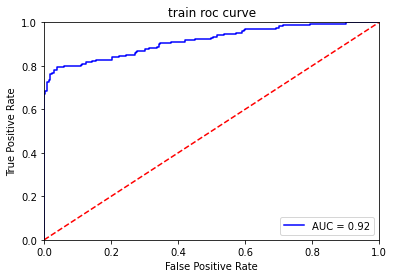

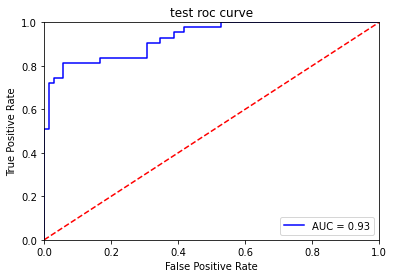

train confusion matrix is [[285   0]
 [ 64 105]]
test confusion matrix is [[71  1]
 [18 25]]
Avg train acc is 0.8501468428781204
Avg test acc is 0.8524637681159422
Avg train precision is 0.9929585623739378
Avg test precision is 0.9916491188109189
Avg train recall is 0.6017751479289941
Avg test recall is 0.6108527131782946
Avg train f1 score is 0.7489320529368171
Avg test f1 score is 0.7539830957695879
Avg train auc is 0.9125284611924287
Avg test auc is 0.9210378983634797


In [31]:
for M in range(30):
    # run n_init times Kmeans
    clt = KMeans(n_clusters = 2 , n_init = 6, random_state = M)
    
    # preprocessing data
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(pos[features], pos["Diagnosis"],
                                                                        test_size = 0.2, random_state = M)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(neg[features], neg["Diagnosis"],
                                                                        test_size = 0.2, random_state = M)
    X_train = pd.concat([X_train_pos, X_train_neg]).reset_index(drop = True)
    y_train = pd.concat([y_train_pos, y_train_neg]).reset_index(drop = True)
    X_test = pd.concat([X_test_pos, X_test_neg]).reset_index(drop = True)
    y_test = pd.concat([y_test_pos, y_test_neg]).reset_index(drop = True)
    
    clt.fit(X_train)
    center0 = clt.cluster_centers_[0].reshape(1, -1)
    center1 = clt.cluster_centers_[1].reshape(1, -1)
    dist0 = eu_dist(X_train.values, center0)
    dist1 = eu_dist(X_train.values, center1)
    index0 = np.squeeze(np.argsort(dist0, axis = 0))[0:30]
    index1 = np.squeeze(np.argsort(dist1, axis = 0))[0:30]
    label0 = y_train[index0].mode()[0]
    label1 = y_train[index1].mode()[0]
    y_pred_train = clt.labels_ + 1
    y_pred_train[y_pred_train == 1] = label0
    y_pred_train[y_pred_train == 2] = label1
    
    y_pred_test = clt.predict(X_test) + 1
    y_pred_test[y_pred_test == 1] = label0
    y_pred_test[y_pred_test == 2] = label1
    
    if label0 == 0:
        y_proba_train = softmax(X_train, clt.cluster_centers_)
        y_proba_test = softmax(X_test, clt.cluster_centers_)
    else:
        y_proba_train = np.flip(softmax(X_train, clt.cluster_centers_), 1)
        y_proba_test = np.flip(softmax(X_test, clt.cluster_centers_), 1)
    
    # acc
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
    # precision recall f1 score
    
    train_precision.append(precision_score(y_train, y_pred_train))
    test_precision.append(precision_score(y_test, y_pred_test))
    train_recall.append(recall_score(y_train, y_pred_train))
    test_recall.append(recall_score(y_test, y_pred_test))
    train_F1.append(f1_score(y_train, y_pred_train))
    test_F1.append(f1_score(y_test, y_pred_test))
    # auc
    if M == 0:
        custom_roc(y_train, y_proba_train, "train roc curve")
        custom_roc(y_test, y_proba_test, "test roc curve")
        print(f"train confusion matrix is {confusion_matrix(y_train, y_pred_train)}")
        print(f"test confusion matrix is {confusion_matrix(y_test, y_pred_test)}")

    train_AUC.append(roc_auc_score(y_train, y_proba_train[:,1]))
    test_AUC.append(roc_auc_score(y_test, y_proba_test[:,1]))
print(f"Avg train acc is {np.mean(train_accuracy)}")
print(f"Avg test acc is {np.mean(test_accuracy)}")
print(f"Avg train precision is {np.mean(train_precision)}")
print(f"Avg test precision is {np.mean(test_precision)}")
print(f"Avg train recall is {np.mean(train_recall)}")
print(f"Avg test recall is {np.mean(test_recall)}")
print(f"Avg train f1 score is {np.mean(train_F1)}")
print(f"Avg test f1 score is {np.mean(test_F1)}")
print(f"Avg train auc is {np.mean(train_AUC)}")
print(f"Avg test auc is {np.mean(test_AUC)}")

iv) Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.

In multivariate statistics, spectral clustering techniques make use of the spectrum of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the dataset.

In [33]:
def fpr_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm[0][1] / np.sum(cm[0])

def tpr_score(y_true, y_pred):
    return recall_score(y_true, y_pred)

def majority_polling(y, index, threshold=0.5):
    if np.sum(y[index]) > len(index) * threshold:
        return 1
    else:
        return 0

In [34]:
def auc_generator(y, y_pred):
    tpr = []
    fpr = []
    for t in np.arange(0.01, 1.01, 0.01):
        y_pred_iter = y_pred + 1
        label0 = majority_polling(y, index0, threshold = t)
        label1 =  majority_polling(y, index1, threshold = t)
        y_pred_iter[y_pred_iter == 1] = label0
        y_pred_iter[y_pred_iter == 2] = label1
        fpr.append(fpr_score(y, y_pred_iter))
        tpr.append(tpr_score(y, y_pred_iter))
    roc_auc = auc(fpr, tpr)
    return roc_auc
    
def spectral_roc(y, y_pred, index0, index1):
    tpr = []
    fpr = []
    for t in np.arange(0.01, 1.01, 0.01):
        y_pred_iter = y_pred + 1
        label0 = majority_polling(y, index0, threshold = t)
        label1 =  majority_polling(y, index1, threshold = t)
        y_pred_iter[y_pred_iter == 1] = label0
        y_pred_iter[y_pred_iter == 2] = label1
        fpr.append(fpr_score(y, y_pred_iter))
        tpr.append(tpr_score(y, y_pred_iter))
    roc_auc = auc(fpr, tpr)
    plt.title("train roc curve")
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

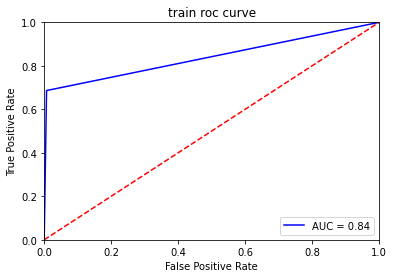

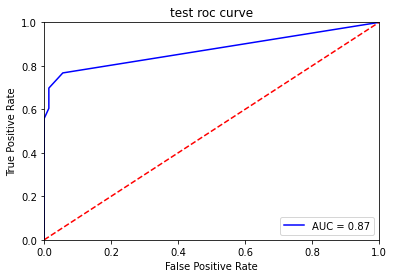

train confusion matrix is [[283   2]
 [ 53 116]]
test confusion matrix is [[71  1]
 [16 27]]
Avg train acc is 0.8566813509544784
Avg test acc is 0.8530434782608697
Avg train precision is 0.9829681531097045
Avg test precision is 0.9943526868478204
Avg train recall is 0.6260355029585799
Avg test recall is 0.6108527131782946
Avg train f1 score is 0.7637096699773388
Avg test f1 score is 0.7523313023298333
Avg train auc is 0.8097428976781204
Avg test auc is 0.8778692937123173


In [37]:
svm = LinearSVC(penalty = "l1", dual = False)
train_accuracy = []
train_precision = []
train_recall = []
train_F1 = []
train_AUC = []

test_accuracy = []
test_precision = []
test_recall = []
test_F1 = []
test_AUC = []

KNN = KNeighborsClassifier(n_jobs = -1)
scaler = MinMaxScaler()


for M in range(30):
    # after test, we will choose gamma = 0.01
    clt = SpectralClustering(n_clusters = 2 , n_init = 10, random_state = M, gamma = 1, n_jobs = -1)
    
    # preprocessing data
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(pos[features], pos["Diagnosis"],
                                                                        test_size = 0.2, random_state = M)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(neg[features], neg["Diagnosis"],
                                                                        test_size = 0.2, random_state = M)
    X_train = pd.concat([X_train_pos, X_train_neg]).reset_index(drop = True)
    y_train = pd.concat([y_train_pos, y_train_neg]).reset_index(drop = True)
    X_test = pd.concat([X_test_pos, X_test_neg]).reset_index(drop = True)
    y_test = pd.concat([y_test_pos, y_test_neg]).reset_index(drop = True)
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    
    labels = clt.fit_predict(X_train)
    index0 = np.where(labels == 0)[0]
    index1 = np.where(labels == 1)[0]
    label0 = y_train[index0].mode()[0]
    label1 = y_train[index1].mode()[0]
    y_pred_train = labels + 1
    y_pred_train[y_pred_train == 1] = label0
    y_pred_train[y_pred_train == 2] = label1
    
    KNN.fit(X_train, y_pred_train)
    
    y_pred_test = KNN.predict(X_test)
    y_proba_test = KNN.predict_proba(X_test)
       
    # acc
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
    # precision recall f1 score
    
    train_precision.append(precision_score(y_train, y_pred_train))
    test_precision.append(precision_score(y_test, y_pred_test))
    train_recall.append(recall_score(y_train, y_pred_train))
    test_recall.append(recall_score(y_test, y_pred_test))
    train_F1.append(f1_score(y_train, y_pred_train))
    test_F1.append(f1_score(y_test, y_pred_test))
    # auc
    if M == 1:
        spectral_roc(y_train, labels, index0, index1)
        custom_roc(y_test, y_proba_test, "test roc curve")
        print(f"train confusion matrix is {confusion_matrix(y_train, y_pred_train)}")
        print(f"test confusion matrix is {confusion_matrix(y_test, y_pred_test)}")
    
    auc_train = auc_generator(y_train, labels)
    auc_test = roc_auc_score(y_test, y_proba_test[:,1])
    
    train_AUC.append(auc_train)
    test_AUC.append(auc_test)

print(f"Avg train acc is {np.mean(train_accuracy)}")
print(f"Avg test acc is {np.mean(test_accuracy)}")
print(f"Avg train precision is {np.mean(train_precision)}")
print(f"Avg test precision is {np.mean(test_precision)}")
print(f"Avg train recall is {np.mean(train_recall)}")
print(f"Avg test recall is {np.mean(test_recall)}")
print(f"Avg train f1 score is {np.mean(train_F1)}")
print(f"Avg test f1 score is {np.mean(test_F1)}")
print(f"Avg train auc is {np.mean(train_AUC)}")
print(f"Avg test auc is {np.mean(test_AUC)}")

v)

From the acc and AUC and the errors from the above three kinds of test, we can conclude that the supervised learning as expected perform the best, then is the semi supervised learning, lastly, the unspervised learning performed worsed. The results are what we expected to happened. 

## 2. Active Learning Using Support Vector Machines

a)Download the banknote authentication Data Set

In [45]:
dataframe = pd.read_csv("./Data/data_banknote_authentication.csv", header = None)
dataframe

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [68]:
X = dataframe.iloc[:,:-1]
y = dataframe[4]
#Choose 472 data points randomly as the test set
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=472,random_state = None)
train_index = list(X_train.index)
test_index = list(X_test.index)

b)i)Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure

In [65]:
svm = LinearSVC(penalty = "l1", dual = False)
pipe = Pipeline([("scaler", StandardScaler()), ("svc", svm)])
params = {"svc__C" : [0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(pipe, params, cv = 5, scoring = "accuracy",  n_jobs = -1)

for M in range(50):
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=472,random_state = M)
    train_index = list(X_train.index)
    test_index = list(X_test.index)
    
    passive_err = []
    index_remain, index_list = train_test_split(train_index, test_size = 10, random_state = M)
    for _ in range(90):
        X_train_iter = X_train.loc[index_list]
        y_train_iter = y_train.loc[index_list]
        clf.fit(X_train_iter, y_train_iter)
        passive_err.append(1 - clf.score(X_test, y_test))
        if len(index_remain) == 0:
            break
        elif len(index_remain) > 10:
            index_reamin, index_new = train_test_split(index_remain, test_size = 10 ,random_state = M)
            index_list += index_new
        else:
            index_list += index_remain
                

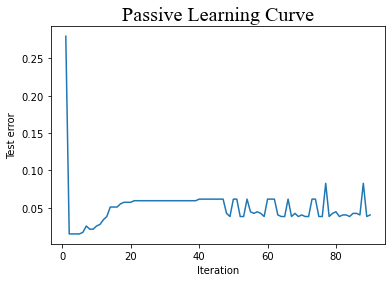

In [71]:
x = np.arange(1, 90+1)
y = np.array(passive_err)
plt.title("Passive Learning Curve", fontsize=20, fontname="Times New Roman")
plt.xlabel('Iteration')
plt.ylabel('Test error')
plt.plot(x, y)
plt.show()

The diagram here is the passive learning curve trained by SVM.

b)ii)

In [69]:
for M in range(50):
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=472,random_state = M)
    train_index = list(X_train.index)
    test_index = list(X_test.index)
    
    active_err = []
    index_remain, index_list = train_test_split(train_index, test_size = 10, random_state = M)
    for _ in range(90):
        X_train_iter = X_train.loc[index_list]
        y_train_iter = y_train.loc[index_list]
        clf.fit(X_train_iter, y_train_iter)
        active_err.append(1 - clf.score(X_test, y_test))
        if len(index_remain) == 0:
            break
        else:
            dist = np.abs(clf.decision_function(X_train.loc[index_remain]))
            index_new = [index_remain[d] for d in np.argsort(dist)[:10]]
            index_list += index_new
            for index in index_new:
                index_remain.remove(index)

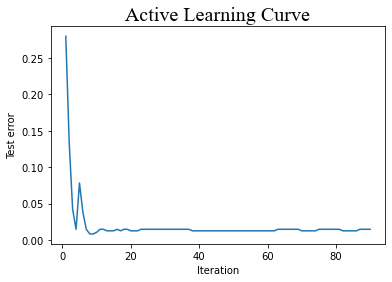

In [72]:
x = np.arange(1,90+1)
y = np.array(active_err)
plt.title("Active Learning Curve", fontsize=20, fontname="Times New Roman")
plt.xlabel('Iteration')
plt.ylabel('Test error')
plt.plot(x, y)
plt.show()

The diagram here is the active learning curve trained by SVM.

c)

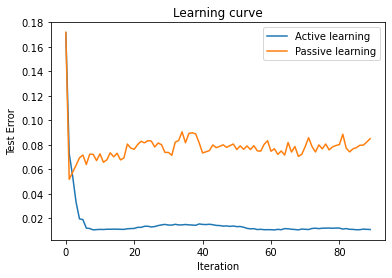

In [74]:
X = dataframe.iloc[:,:-1]
y = dataframe[4]
error_passive = []
error_active = []

for M in range(50):
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=472,random_state = M)
    train_index = list(X_train.index)
    test_index = list(X_test.index)
    
    passive_err = []
    index_remain, index_list = train_test_split(train_index, test_size = 10, random_state = M)
    for _ in range(90):
        X_train_iter = X_train.loc[index_list]
        y_train_iter = y_train.loc[index_list]
        clf.fit(X_train_iter, y_train_iter)
        passive_err.append(1 - clf.score(X_test, y_test))
        if len(index_remain) == 0:
            break
        elif len(index_remain) > 10:
            index_reamin, index_new = train_test_split(index_remain, test_size = 10 ,random_state = M)
            index_list += index_new
        else:
            index_list += index_remain
                
    active_err = []
    index_remain, index_list = train_test_split(train_index, test_size = 10, random_state = M)
    for _ in range(90):
        X_train_iter = X_train.loc[index_list]
        y_train_iter = y_train.loc[index_list]
        clf.fit(X_train_iter, y_train_iter)
        active_err.append(1 - clf.score(X_test, y_test))
        if len(index_remain) == 0:
            break
        else:
            dist = np.abs(clf.decision_function(X_train.loc[index_remain]))
            index_new = [index_remain[d] for d in np.argsort(dist)[:10]]
            index_list += index_new
            for index in index_new:
                index_remain.remove(index)
    error_passive.append(passive_err)
    error_active.append(active_err)
    
active_avg = np.mean(error_active, axis = 0)
passive_avg = np.mean(error_passive, axis = 0)
iter_num = [i for i in range(90)]
plt.plot(iter_num, active_avg, label = "Active learning")
plt.plot(iter_num, passive_avg, label = "Passive learning")
plt.title("Learning curve")
plt.xlabel("Iteration")
plt.ylabel("Test Error")
plt.legend()
plt.show()

The diagram above is the learning curve by Monte-Carlo simulation I obtained.

Reference

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://docs.python.org/3/library/warnings.html#warnings.catch_warnings

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://stackoverflow.com/questions/53784971/how-to-disable-convergencewarning-using-sklearn

https://github.com/scikit-learn/scikit-learn/issues/17339

http://ethen8181.github.io/machine-learning/clustering/kmeans.html

https://stats.stackexchange.com/questions/48757/why-doesnt-k-means-give-the-global-minimum

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

https://www.geeksforgeeks.org/ml-spectral-clustering/

https://www.analyticsvidhya.com/blog/2021/05/what-why-and-how-of-spectral-clustering/